# Table of Contents

* [1 General Functions](#general_functions)
* [1.1 Functions to Save and Open Variables](#open_save)
* [2 Datasets](#load_datasets)
    * [2.1 Load Reuters Corpus Volume 1 (rcv1) Dataset](#load_rcv1)
    * [2.2 Dataset Attributes of rcv1](#attributes_rcv1)
    * [2.3 Load Modified National Institute of Standards and Technology (MNIST) Dataset](#load_mnist)
    * [2.4 Train/Test Split](#train_test_split)
    * [2.5 Dataset Attributes of MNIST](#attributes_mnist)
* [3 Document Classification](#document_classification)
    * [3.1 Naive Bayes](#naive_bayes)
        * [3.1.1 Naive Bayes on rcv1](#nb_rcv1)
        * [3.1.2 Naive Bayes on MNIST](#nb_mnist)
    * [3.2 Generating Predictions](#generating_predictions)
    * [3.3 Evaluating Predictions](#evaluating_predictions)
    * [3.4 Recall vs Precision Graph](#recall_precision_graph)
        * [3.4.1 Recall-Precision Graph for Naive Bayes with rcv1](#graph_nb_rcv1)
        * [3.4.2 Recall-Precision Graph for for Naive Bayes with MNIST](#graph_nb_mnist)
    * [3.5 K-Folds Cross-Validation](#k_folds)
    * [3.6 Support Vector Machines (SVM)](#svm)
        * [3.6.1 SVM on rcv1](#svm_rcv1)
        * [3.6.2 SVM on mnist](#svm_mnist)
    * [3.7 k-Nearest Neighbors (kNN)](#knn)
        * [3.7.1 kNN on rcv1](#knn_rcv1)
        * [3.7.2 kNN on mnist](#knn_mnist)
    * [3.8 Decision Trees](#decision_trees)
        * [3.7.1 Decision Trees on rcv1](#dt_rcv1)
        * [3.7.2 Decision Trees on mnist](#dt_mnist)    

# Basic Terminology <a id='basic_terminology'></a>



The following table shows a sample of the Iris data set. The Iris data set will be used to explain important foundational terminology. This data set consists of various measurements of iris flowers and the species of that particular flower. 

|Sepal length | Sepal width | Petal length | Petal width |  Species   |
|-------------|-------------|--------------|-------------|------------|
| 5.1 | 3.5 | 1.4 | 0.2 | setosa   |
| 4.9 | 3.0 | 1.4 | 0.2 | setosa   |
| 4.7 | 3.2 | 1.3 | 0.2 | setosa   |
| 7.0 | 3.2 | 4.7 | 1.4 | versicolor  |
| 6.4 | 3.2 | 4.5 | 1.5 | versicolor  |
| 6.9 | 3.1 | 4.9 | 1.5 | versicolor  |
| 6.3 | 3.3 | 6.0 | 2.5 | virginica  |
| 5.8 | 2.7 | 5.1 | 1.9 | virginica  |
| 7.1 | 3.0 | 5.9 | 2.1 | virginica  |

The rows of this table represent individual data points, in this case individual iris flowers. The columns are called the <b>features</b> or <b>predictors</b>, they will be used to infer the class labels of new data. In the case of the iris data set the species is what we would like to predict. So this data set has four predictors: Sepal length, Sepal width, Petal length, and Petal width. The Species column represents the <b>true label</b> of each data point.  In this data set there are 3 possible class labels: setosa, versicolor, and virginica. The labeled data gives examples of actual members of each class, this information is used by the classification algorithm to predict the class labels of new data.<br>
<br>
A <b>feature vector</b> is simply a row from a data set, using our iris example suppose we have the following feature vector: <br>
$$f_1 = (5.1, \ 3.5, \ 1.4, \ 0.2)$$
$\ f_1$ corresponds to a iris flower with a sepal length of 5.1, a sepal width of 3.5, a petal length of 1.4, and a petal width of 0.2. <br>

### Types of classification problems
<b>Binary Classification</b>: There are exactly two possible classes. For example, imagine a spam filter for a email service, a message can be classified as either spam or not spam. 

<b>Multiclass Classification</b>: There are more than two classes. Imagine classifying hand-written digits, there are 10 possible class labels one for each number 0-9.

<b>Muti-label Classification</b>: There are more than two classes and each training instance can be assigned more than one class label. Imagine classifying images of fruit. A picture could contain only an apple or apples and pears or perhaps oranges, bananas and apples.


# General Functions <a id='general_functions'></a>

## Functions to Save and Open Variables <a id='open_save'></a>

Since it is not uncommon for a machine learning task to take a long time it is good practice to save variables that may be needed in the future. This can be achieved by using the <a target="_top" href="https://docs.python.org/3/library/pickle.html">pickle</a> module. This package allows a variable up to 4gb to be saved. This limitation is why the 'metrics' variables are saved as individual items instead of a dictionary.

In [ ]:
# Save variables to file
import pickle

def save_var(variable_name):
    """ Saves the variable with the provided variable name 
         in the global namespace to the ./vars folder 
         with the provided same name """
    
    with open('./vars/' + variable_name,'wb') as my_file_obj:
        pickle.dump(globals()[variable_name], my_file_obj, protocol=4)

def save_var_list(variable_name_list):
    """ Saves each variable with the provided variable name 
         in the global namespace to the ./vars folder 
         with the provided same name """
    for name in variable_name_list:
        with open('./vars/' + name,'wb') as my_file_obj:
            pickle.dump(globals()[name], my_file_obj, protocol=pickle.HIGHEST_PROTOCOL)

def open_var(file_name):
    """ Returns the variable saved with the provided 
         file name located in the ./vars folder"""
    
    file_object = open('./vars/' + file_name,'rb')  

    loaded_var = pickle.load(file_object)
    
    return loaded_var

def open_var_list(file_name_list):
    """ Loads a variable corresponding to each file name
         in file_name_list to the global namespace. """
    
    for file_name in file_name_list:
        globals()[file_name] = open_var(file_name)

In [ ]:
%time open_var_list(['rcv1_train', 'rcv1_test'])

In [ ]:
%time save_var_list(['mnist', 'mnist_train', 'mnist_test', 'rcv1_train', 'rcv1_test'])

In [ ]:
class Dataset_Part:
    """ Represents a dataset with attributes
         data and target """
    
    data = None
    target = None
    def __init__(self, X, y):
        self.data = X
        self.target = y

%time open_var_list(['mnist_train', 'mnist_test'])

## Load Datasets <a id='load_datasets'></a>

### <a target="_top" href="http://scikit-learn.org/stable/datasets/rcv1.html">Load Reuters Corpus Volume I (rcv1) Dataset</a> <a id='load_rcv1'></a> 

Scikit-learn includes functions to easily load some popular datasets. One of the included datasets is rcv1. This dataset can be loaded completly or broken into test and train subsets. This dataset consists of over 800,000 manually categorized news stories. The data is represented by cosine-normalized log TF-IDF vectors and the labels are 103 classes with binary values.

In [ ]:
from sklearn.datasets import fetch_rcv1

%time rcv1 = fetch_rcv1()

In [ ]:
from sklearn.datasets import fetch_rcv1

%time rcv1_train, rcv1_test = (fetch_rcv1(subset='train'), fetch_rcv1(subset='test'))

### Dataset Attributes of rcv1 <a id='attributes_rcv1'></a>

Datasets loaded from scikit-learn will typically have several attributes.

   1. __data__ - a scipy <a target="_top" href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html">compressed row storage (CSR) sparce matrix</a>. Non-zero values are cosinne-normalized, log TF-IDF vectors. The shape is (num_samples, num_features)
   2. __target__ - a scipy CSR sparse matrix. Maps each sample to relavent categories (sometimes refered to as labels). The shape is (num_samples, num_categories).
   3. __sample_id__ - a <a target="_top" href="https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html">numpy n-dimensional array</a> (ndarray) associating each sample's ID to its sample number
   4. __target_names__ - a ndarray of target names (can be thought of as topics or categories) corresponding to the category mapping in __(2)__. Each sample belongs to n categories, where 1 $\le$ n $\le$ 13.
   5. __DESCR__ - a description of the dataset
   
The shape attribute gives the dimensions of the matrix.

In [ ]:
def get_nonzero(matrix):
    """ Returns the percent of items in the provided 
         matrix that are not 0.
         
        Params:
          matrix -- a csr sparse matrix """
    
    nonzero = (matrix.count_nonzero() / (matrix.shape[0] * matrix.shape[1])) * 100
    # Check value is valid
    assert nonzero <= 100
    assert nonzero >= 0
    
    return nonzero

def print_rcv1_attributes(dataset):
    """ Prints attributes of the provided dataset.
    
        Params:
          dataset -- the RCV1 full dataset or a subset """
    
    print(f'  rcv1 type: {type(dataset)}')
    
    print ('data:')
    print(f'      shape: {dataset.data.shape}')
    print(f'  data type: {dataset.data.dtype}')
    print(f' array type: {type(dataset.data)}')
    print(f'    nonzero: {get_nonzero(dataset.data):0.4f}%\n')

    print('target:')
    print(f'      shape: {dataset.target.shape}')
    print(f'  data type: {dataset.target.dtype}')
    print(f' array type: {type(dataset.target)}')
    print(f'    nonzero: {get_nonzero(dataset.target):0.4f}%\n')

    print('sample_id:')
    print(f'      shape: {dataset.sample_id.shape}')
    print(f'  data type: {type(dataset.sample_id[3])}')
    print(f' array type: {type(dataset.sample_id)}\n')

    print('target_names:')
    print(f'      shape: {dataset.target_names.shape}')
    print(f'  data type: {type(dataset.target_names[3])}')
    print(f' array type: {type(dataset.target_names)}')

In [ ]:
print('rcv1 dataset attributes')
print_rcv1_attributes(rcv1)

In [ ]:
print('rcv1 training subset attributes:')
print_rcv1_attributes(rcv1_train)

In [ ]:
print('\nrcv1 testing subset attributes:')
print_rcv1_attributes(rcv1_test)

### <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html">Modified National Institute of Standards and Technology (MNIST) Dataset</a> <a id='load_mnist'></a> 


Another included dataset is MNIST. This dataset is 70,000 handwritten digits represented by 28x28 pixel images. The classes correspond to the number shown in the image. Since each image is 28x28 each pixel is a feature giving each document 784 features.

In [ ]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

### Train/Test Split <a id='train_test_split'></a>

Since MNIST does not have a default train/test set like rcv1 we will use a train/test split. This is when a dataset is broken into two parts, one to train the classifier and one to test it. When decomposing the dataset it is important to ensure equal representation of each class. MNIST is sorted by  digit; therefore, if the dataset is simply partitioned in order there may be no instances of a particular class. This can be alleviated by shuffling the dataset. 

In [ ]:
from sklearn.model_selection import train_test_split

# To keep the .data and .target format consistent 
class Dataset_Part:
    """ Represents a dataset with attributes
         data and target """
    
    data = None
    target = None
    def __init__(self, X, y):
        self.data = X
        self.target = y

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=.33, random_state=35)
mnist_train, mnist_test = Dataset_Part(X_train, y_train), Dataset_Part(X_test, y_test)

### Dataset Attributes of MNIST <a id='attributes_mnist'></a>

Datasets loaded from scikit-learn will typically have several attributes.

   1. __data__ - a <a target="_top" href="https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html">numpy n-dimensional array</a> (ndarray). The value of each feature corresponds to the intensity of a pixel. Each feature is represented by an intensity 0 (white) to 255 (black). The shape is (num_samples, num_features).
   2. __target__ - a <a target="_top" href="https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html">numpy n-dimensional array</a> (ndarray) associating each sample's ID to the value of the handwritten digit.
   
The shape attribute gives the dimensions of the matrix.

In [ ]:
import numpy as np

def get_avg_nonzero(subset):
    """ Returns the percent of items in the provided 
         list matricies that are not 0.
         
        Params:
          matrix -- a csr sparse matrix """
    
    return (np.count_nonzero(subset) / (subset.shape[1] * subset.shape[0])) * 100

def print_mnist_attributes(dataset):
    """ Prints attributes of the provided dataset.
    
        Params:
          dataset -- the mnist full dataset """
    
    print(f'     mnist type: {type(dataset)}')
    
    print ('data:')
    print(f'          shape: {dataset.data.shape}')
    print(f'      data type: {dataset.data.dtype}')
    print(f'     array type: {type(dataset.data)}')
    print(f' nonzero pixels: {get_avg_nonzero(dataset.data):0.4f}%\n')

    print('target:')
    print(f'          shape: {dataset.target.shape}')
    print(f'      data type: {dataset.target.dtype}')
    print(f'     array type: {type(dataset.target)}')

In [ ]:
print('MNIST train dataset attributes')
print_mnist_attributes(mnist_train)

In [ ]:
print('MNIST test dataset attributes')
print_mnist_attributes(mnist_test)

It is also possible to view a document as an image by reshaping the array to a 28x28 matrix.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random

def print_rand_digit():  
    # Get a random document
    rand_index = random.randint(0,70000)
    rand_digit = mnist_train.data[rand_index]
    # Reshape it to the size of the image
    rand_digit_image = rand_digit.reshape(28,28)

    # Some information
    print(f'\tIndex: {rand_index}\tLabel: {mnist_train.target[rand_index]:.0f}')
    # Show the image
    plt.imshow(rand_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
print_rand_digit()

# <a target="_top" href="http://scikit-learn.org/stable/modules/naive_bayes.html">Naive Bayes</a> <a id='naive_bayes'></a>
A supervised learning algorithm based on using Bayes' theorem. This method assumes independence between each pair of features.

Bayes Theorem from eq. 1 in [zhang-2004]:
\begin{equation}
p(c \mid x_1, . . ., x_n) = \frac{P(c) P(a_1, . . ., a_n | y)} {P(a_1, . . ., a_n)}
\end{equation}

By assuming all attributes are independent we can further simplify $p(a_1, . . ., a_n \mid c)$ eq. 2 from [zhang-2008], this is the naive assumption of naive bayes.

\begin{equation}
p(x_1, . . ., x_n \mid c) = \prod_{i = 1}^{n} P(x_i | c)
\end{equation}

This gives us our classification rule, as shown in eq. 3 from [zhang-2008]. 

\begin{equation}
C_{nb}(x_1, . . ., x_n) = \underset{c}{arg} \max p(c)  \prod_{i = 1}^{n} P(x_i | c)
\end{equation}

SciKit Learn supports several Naive Bayes implimentations. 
1. <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">__Gaussian Naive Bayes__</a> - In this implementation the likelihood of the features is assumed to be Gaussian. Gaussian distributions are more commonly reffered to as the normal distribution and in this instance will be represented as $g(x_i, \mu_{i,c}, \sigma_{i,c})$, where $\mu$ is the mean and $\sigma$ is the typical deviation. The probability of a document vector $\vec{x}$ using multinomial Naive Bayes is shown in section 2.2 of [metsis-2006]. Let $\vec{x}$ represent the term frequency vector of the document to be evaulated, where $x_i$ represents the number of times $t_i$ appears in the document.

\begin{equation}
    p(\vec{x} \mid c) =  \prod_{i = 1}^{m} g(x_i, \mu_{i,c}, \sigma_{i,c})
\end{equation}

In [ ]:
#visualization of a normal distribution

#feel free to edit the mean and stdDiv variables to see
#how the distribution is affected

mean = 0
stdDev = 1 #standard deviation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy



bounds = np.linspace(mean - 3*stdDev, mean + 3*stdDev, 100)
normalCurve = scipy.stats.norm.pdf(x, mean, stdDev)
plt.plot(bounds,normalCurve)
plt.fill_between(bounds,normalCurve, hatch='/')
plt.title('Gaussian (Normal) Distribution with Mean ' + str(mean) + ' and Standard Deviation ' + str(stdDev))
plt.show()


#!!!!!!!Fill in under the curve
#add unuiqe variable names


2. <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html">__Multinomial Naive Bayes__</a> - In this implementation the likelihood of the features is assumed to follow a multinomial distribution. Typically used in text classification. This model is useful in text calssification because it uses word frequency in classification decisions [mccallum-1998]. The probability of a document vector $\vec{x}$ using multinomial Naive Bayes is shown in section 2.2 of [metsis-2006]. Let $\vec{x}$ represent the term frequency vector of the document to be evaulated, where $x_i$ represents the number of times $t_i$ appears in document $d$, and let $d$ be a bag of words representation of the document.

\begin{equation}
    p(\vec{x} \mid c) =  p(\mid d \mid) \cdot \mid d \mid ! \cdot  \prod_{i = 1}^{m} \frac{p(t_i \mid c)^{x_i} }{x_i!}
\end{equation}

In [ ]:
#multinomial distribution visualization

from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt

#changes the values of proabalityVector to see how the observed distribution
#is changed, NOTE: all probabilites must sum up to 1
probabilityVector = [0.1, 0.2, 0.3, 0.2, 0.1, 0.1] #!!!!!!add more descripiton

n = 100

outcomes = multinomial.rvs(n, probabilityVector, size=1, random_state=0)

outcomes = outcomes[0]

fig, ax = plt.subplots()
index = np.arange(6)
barWidth = 0.35


bars = ax.bar(index, outcomes, barWidth, color='b',label='Outcomes',alpha=0.5)

ax.set_xlabel('Side', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Outcomes of rolling a loaded die 100 times', fontsize=16)

plt.show()



3. <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html">__Bernoulli Naive Bayes__</a> - This implementaiton assumes the data follows multivariate Bernoulli distributions. Multiple features are allowed but each feature is assumed to be a binary variable [mccallum-1998]. The probability of a binary document vector $\vec{x}$ using multivatiate Bernoulli Naive Bayes is shown in section 2.1 of [metsis-2006]. Let $\vec{x}$ be a binary vector where $x_i$ represents whether term $t_i$ is in the document.

\begin{equation}
    p(\vec{x} \mid c) =  \prod_{i = 1}^{m} p(t_i \mid c)^{x_i} \cdot (1 - p(t_i \mid c)^{(1 - x_i)}
\end{equation}

In [ ]:
#Bernoulli Distribution




Because of these restrictions only Multinomial Naive Bayes will be appropriate for the RCV1 dataset. There is an additional step required because Naive Bayes does not typically predict multilple labels. This means an additional strategy must be implemented. One commonly used startegy is known as one-vs-all <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier">one-vs-the-rest</a> in scikit learn. This strategy works by using one classifier for each label.

## Naive Bayes on rcv1 <a id='nb_rcv1'>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.datasets import fetch_rcv1

#load the rcv1 dataset if its has not aready been loaded
if('rcv1_train' not in locals() or 'rcv1_test' not in locals()):
    print('Loading datasets')
    rcv1_train, rcv1_test = (fetch_rcv1(subset='train'), fetch_rcv1(subset='test'))

#clf_NB_rcv1 is a list of naive bayes classifiers each with a different value for the hyper(tunning) parameter alpha.
#So we are training four different naive bayes classifiers
#clf is a abbreviation of the word classifier
clf_NB_rcv1 = [OneVsRestClassifier(MultinomialNB(alpha=1), n_jobs=-1),
          OneVsRestClassifier(MultinomialNB(alpha=.25), n_jobs=-1),
          OneVsRestClassifier(MultinomialNB(alpha=.05), n_jobs=-1),
          OneVsRestClassifier(MultinomialNB(alpha=.01), n_jobs=-1)]
    
# rcv1 training set does not contain all the labels and throws a warning.
# This with statement will suppress these warnings.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #this list comprehension fits each naive bayes classifier to the training data set 
    %time clf_NB_rcv1 = [clf.fit(rcv1_train.data, rcv1_train.target) for clf in clf_NB_rcv1]

titles_NB_rcv1 = ['alpha=1', 'alpha=.25', 'alpha=.05', 'alpha=.01']

### Naive Bayes on MNIST<a id='nb_mnist'></a> 
Since MNIST is much smaller and not a multioutput problem it will be used to demenstrate Multinomial Niave Bayes, Gaussian Niave Bayes, and Bernoulli Niave Bayes. Notice that the OneVsRestClassifier is not necessary when using MNIST because it is not a multioutput dataset (meaning each sample only has one label).

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.datasets import fetch_mldata

from datasets import load_mnist

#load mnist dataset
mnist_train, mnist_test = load_mnist()

#clf_NB_mnist is a list of naive bayes classifiers each using a different base distribution,
#namely the Multinomial distribution, the Gaussian (normal) distribution, and the Bernulli distribution
clf_NB_mnist = [MultinomialNB(),
          GaussianNB(),
          BernoulliNB()]

#fit each of the classifiers to the training data
%time clf_NB_mnist = [clf.fit(mnist_train.data, mnist_train.target) for clf in clf_NB_mnist]

titles_NB_mnist = ['Multinomial', 'Gaussian', 'Bernoulli']

## Generating Predictions <a id='generating_predictions'></a>

Classifiers in machine learning are used to predict the label(s) of a new document that the classifier has never seen. Niave Bayes generates predictions by finding the label(s) with the highest probability.

In [ ]:
#predict class labels for the test data
%time pred_NB_rcv1 = [clf.predict(rcv1_test.data) for clf in clf_NB_rcv1]

In [ ]:
#predict class labels for the test data
%time pred_NB_mnist = [clf.predict(mnist_test.data) for clf in clf_NB_mnist]

# Evaluating Predictions <a id='evaluating_predictions'></a>
When testing a machine learning algorithm it is difficult to determine how a classifier performs by looking at predictions, so several metrics are commonly used to evaluate their performance.

1. __accuracy__ - The percentage of labels predicted correctly.
+ __precision__ - The ratio of true positives to true positives and false positives.
+ __recall__ - The ratio of true positives to true positives and false negatives.
+ __average precision__ - The weighted mean of the precision achieved at each recall threshold.

The term 'micro' average refers to calculating the average of each label weighted with respect to how frequently they occur. This is most appropriate for the RCV1 dataset because the labels do not occur with the same frequency. Information on additional averaging methods can be found <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score">here</a>.

The term 'macro' average refers to calculating the average of each label without taking the label frequency into account. This is appropriate for MNIST because each label occurs with the same frequency. 

In [ ]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, precision_score, recall_score
from scipy.sparse import issparse
import matplotlib.pyplot as plt
from numpy import arange, matrix

def get_scores(target, prediction, avg_type):
 
    scores = { 'accuracy': accuracy_score(target, prediction),
               'f1' : f1_score(target, prediction, average=avg_type),
               'recall' : recall_score(target, prediction, average=avg_type),
               'precision' : precision_score(target, prediction, average=avg_type) }
    
    return scores

def graph_scores(scores, keys, title):

    count = len(scores)
    metric = tuple(t.title() for t in scores[0].keys())
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    bar_width = .81 / count
    y_vals = arange(len(metric))
    
    for i, score in enumerate(scores):
        plt.bar(y_vals + bar_width * (i + ((3 - count) / 2)) , tuple(score.values()), width=bar_width, align='center', alpha=0.2, color=colors[i], linewidth=1, edgecolor='k')

    plt.legend(keys, bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    plt.xticks(y_vals + bar_width, metric)
    plt.ylabel('Score')
    plt.ylim(0.,1.)
    plt.title(f'Evaluation Metrics for {title}\n\n')

    plt.show()
    
def print_scores(scores, avg_type):
    print(f'Accuracy: {scores["accuracy"]:0.4f}')
    print(f'{avg_type}-averaged F1: {scores["f1"]:0.4f}')
    print(f'{avg_type} averaged recall: {scores["recall"]:0.4f}')
    print(f'{avg_type} averaged precision: {scores["precision"]:0.4f}')

### Scores for Naive Bayes on RCV1

In [ ]:
from scoring import get_scores, print_scores

scores_NB_rcv1 = [get_scores(rcv1_test.target, pred, 'micro') for pred in pred_NB_rcv1]

for title, score in zip(titles_NB_rcv1, scores_NB_rcv1):
    print(f'\n{title}')
    print_scores(score, 'micro')

In [ ]:
from scoring import graph_scores

graph_scores(scores_NB_rcv1, titles_NB_rcv1, 'Naive Bayes on RCV1')

### Scores for Naive Bayes on MNIST

In [ ]:
from scoring import get_scores, print_scores

scores_NB_mnist = [get_scores(mnist_test.target, pred, 'macro') for pred in pred_NB_mnist]

for title, score in zip(titles_NB_mnist, scores_NB_mnist):
    print(f'\n{title} NB')
    print_scores(score, 'macro')

In [ ]:
from scoring import graph_scores

graph_scores(scores_NB_mnist, titles_NB_mnist, 'Naive Bayes on MNIST')

## Recall vs Precision Graph <a id='recall_precision_graph'></a>

Recall and precision are inversely related, as you increase one the other decreases. Because of this it is often nessicary to adjust the implementation to get the ideal precision or recall for the specific task at hand. A good way to visualize this tradeoff is by graphing recall vs precision at different prediction thresholds. 

In [ ]:
from sklearn.metrics import average_precision_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

from scipy.sparse import issparse
import matplotlib.pyplot as plt
import numpy as np

def graph_precision_recall(target, conf_list, titles, classes=[]):
    colors = iter(['b','r','g','c','m','k'])

    plt.figure()
    
    for confidence in conf_list:
        if issparse(target):
            target = target.toarray()
        
        # If target is multiclass it must be binarized
        if not np.array_equal(target, target.astype(bool)):
            classes_auto = np.unique(target)
            target = label_binarize(target, classes_auto if len(classes) < len(classes_auto) else classes)

        # A "micro-average": quantifying score on all classes jointly
        precision, recall, threshold = precision_recall_curve(target.ravel(), confidence.ravel())
        average_precision = average_precision_score(target, confidence, average="micro")

        
        plt.step(recall, precision, color=next(colors), alpha=.5,where='post')

    plt.legend(titles, bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curves')
    plt.show()

### Precision Recall Curve for Naive Bayes on RCV1 <a id='graph_nb_rcv1'></a>

In [ ]:
from scoring import graph_precision_recall

%time confidence_NB_rcv1 = [clf.predict_proba(rcv1_test.data) for clf in clf_NB_rcv1]
%time graph_precision_recall(rcv1_test.target, confidence_NB_rcv1, titles_NB_rcv1) 

### Precision Recall Curve for Naive Bayes on MNIST <a id='graph_nb_mnist'></a>

In [ ]:
from scoring import graph_precision_recall

%time confidence_NB_mnist = [clf.predict_proba(mnist_test.data) for clf in clf_NB_mnist]
%time graph_precision_recall(mnist_test.target, confidence_NB_mnist, titles_NB_mnist)

# <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html">K-Folds Cross-Validation</a> <a id='k_folds'></a>

To remove bias from a train/test split it is common practice to use K-Folds cross-validation, typically k = 10. This splits the dataset into k segments. With these k segments k - 1 are used to train a classifier while the last one is used to test. This is repeated until all k segments have been used as the testing segment. This can be easily implemented through the sklearn function <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score</a>. 

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

from sklearn.datasets import fetch_mldata

from datasets import load_mnist

#load mnist dataset
#mnist_train, mnist_test = load_mnist()

mnist = fetch_mldata('MNIST original')

scores = cross_val_score(BernoulliNB(), mnist.data, mnist.target, cv=10, scoring='f1_macro')

for k, score in enumerate(scores, 1):
    print(f'fold {k} score = {score:0.4f}')

print(f'average score {sum(scores) / len(scores):0.4f}')

fold 1 score = 0.8340
fold 2 score = 0.8191
fold 3 score = 0.8240
fold 4 score = 0.8189
fold 5 score = 0.8198
fold 6 score = 0.8314
fold 7 score = 0.8275
fold 8 score = 0.8286
fold 9 score = 0.8405
fold 10 score = 0.8545
average score 0.8298


# Parametric Models <a id='parametric_models'></a>

Parametric models make assumptions about the shape of the underlying function generating the data. For example, linear regression assumes that a linear function describes the data. Parametric models also include the same number of parameters no matter the size of the data set. These models tend to be more interpretable than non-parametric models but can perform poorly if they assumptions made about the data do not hold.

**Examples:**
- Linear Regression
- Naive Bayes


# Non-parametric Models <a id='non-parametric_models'></a>

Non-parametric models make no assumption about the shape of the underlying function generating the data. These models tend to be less interpretable than parametric models. These types of models often need more training data to perform well.

**Examples:**
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machines


# One-vs-The-Rest and One-vs-One Classification <a id='one_vs_rest'></a>

One-vs-Rest, also called One-vs-All, and One-vs-One classification are a methods used to overcome the binary classification restriction inherent to some classification algorithms. These methods will allow us to use Support Vector Machines and Naive Bayes Classifiers for multiclass classification problems.

### One-vs-The-Rest
One-vs-the-rest classification involves training a separate classifier for each class, the instances of that class are used as positive examples while all other training examples are used as negative examples. This method requires that the classification algorithm give a confidence measurement for its predicted label. To predict the class of a test instance all classifiers classify the test instance, the label given by classifier that reports the highest confidence is chosen. One-vs-The-Rest is a more computationally efficient method since it requires $O(K)$ classifiers, where $K$ is the number of classes. The performance of the classifiers can be skewed since negative examples are over represented. <br>
The Iris data set has classes setosa, versicolor, and virginica. To train a one-vs-rest classifier we would train one classifier to identify setosa using versicolor and virginica as negative examples. Then we would train a classifier to identify versicolor using the instances of virginica and setosa as negative examples. Finally, we train the last classifier to recognize virginica using setosa and versicolor as negative examples. We are effectively training a classifier for each class label.<br> 

### One-vs-One
For One-vs-One classification we train $\frac{K (K - 1)}{2} $ classifiers, where $K$ is the number of classes for the classification problem. Each classifier is trained to differentiate between a pair of classes. To classify a new test instance a voting system is applied, each classifier is run on the sample each prediction for a specific class is considered a vote for that class. The class label which receives the most votes will be returned as the predicted label. There is a possibility that the vote may lead to a tie. This method is more computationally expensive requiring $O(K^{2})$ classifiers. <br>




# <a target="_top" href="http://scikit-learn.org/stable/modules/svm.html">Support Vector Machines (SVM)</a> <a id='svm'></a>
    
A supervised learning that works by seperating the samples into categories seperated by a hyperplane, or set of hyperplanes. Since the hyperplane that that seperates them is not typically unique SVM finds the hyperplane with the maximum margin between classes[boser-1992]. Support Vector Machines are binary classifiers, but by combining multiple classifiers it can be expanded to fit a multi-class classification problem [wu-2004]. The decision function for a SVM can be found in [boser-1992] eq. (4). Let $\alpha_k$ be the adjustable paramaters (weights), $x_k$ be the patterns for training, $b$ be the bias, and the function $K$ be the kernel function [boser-1992] [guyon-1993].

\begin{equation}
    D(x) = \sum_{k=1}^p \alpha_k K(x_k, x) + b
\end{equation}

SVM use kernel functions to compute the similarity between data points. Some of the most common are:

+ polynomial with order $q$ [boser-1992]
\begin{equation}
    K(x, x') = ( x \cdot x' + 1)^q
\end{equation}
+ radial basis function (rbf) - From eq (9) [guyon-1993]
\begin{equation}
    K(x, x') = \exp \bigg\{ - \frac{\mid \mid x - x_i \mid \mid^2}{\sigma^2} \bigg\}
\end{equation}
+ sigmoid - From eq (2.69) [scholkopf-2009]
\begin{equation}
    K(x, x') = tanh(\kappa \langle x,x' \rangle + \vartheta)
\end{equation}

The kernel used can significantly impact the accuracy of a classifier. More information on kernels is provided <a target="_top" href="http://scikit-learn.org/stable/modules/metrics.html">here</a>.

### Support Vector Machines on RCV1 <a id='svm_rcv1'></a>

In [11]:
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier

from sklearn.datasets import fetch_rcv1

#load the rcv1 dataset if its has not aready been loaded
if('rcv1_train' not in locals() or 'rcv1_test' not in locals()):
    print('Loading datasets')
    rcv1_train, rcv1_test = (fetch_rcv1(subset='train'), fetch_rcv1(subset='test'))


clf_SVM_rcv1 =  OneVsRestClassifier(LinearSVC(multi_class='ovr'), n_jobs=40)

# rcv1 training set does not contain all the labels and throws a warning.
# This with statement will suppress these warnings.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    %time clf_SVM_rcv1 = clf_SVM_rcv1.fit(rcv1_train.data, rcv1_train.target)

CPU times: user 4.5 s, sys: 1.81 s, total: 6.31 s
Wall time: 6.54 s


In [13]:
from scoring import get_scores, print_scores

%time pred_SVM_rcv1 = clf_SVM_rcv1.predict(rcv1_test.data)

def check_pred_labels(num_labels, pred):
    # np.where returns a tuple where the second item is
    # the second dimensional indices where the statement is true.
    pred_labels = np.where(pred_SVM_rcv1.todense() == 1)[1]
    
    pred_unique = np.unique(pred_labels)
    
    print(f'\n{pred_unique.shape[0]} unique labels predicted, {num_labels} exist\n')

check_pred_labels(rcv1_test.target.shape[1], pred_SVM_rcv1)
    
# This will throw an UndefinedMetricWarning because not all labels 
# will be predicted. Shown above.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    scores_SVM_rcv1 = get_scores(rcv1_test.target, pred_SVM_rcv1, 'macro')


print_scores(scores_SVM_rcv1, 'macro')

CPU times: user 18.5 s, sys: 8 ms, total: 18.5 s
Wall time: 18.5 s

99 unique labels predicted, 103 exist

Accuracy: 0.5143
macro-averaged F1: 0.4862
macro averaged recall: 0.4026
macro averaged precision: 0.7872


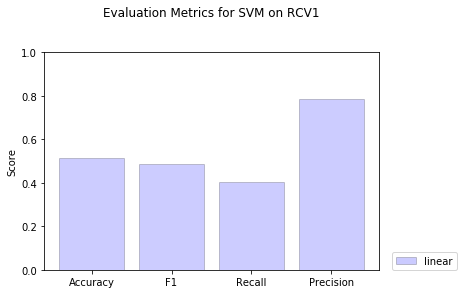

In [14]:
from scoring import graph_scores

graph_scores([scores_SVM_rcv1], ['linear'], 'SVM on RCV1')

CPU times: user 17.8 s, sys: 440 ms, total: 18.2 s
Wall time: 18.2 s


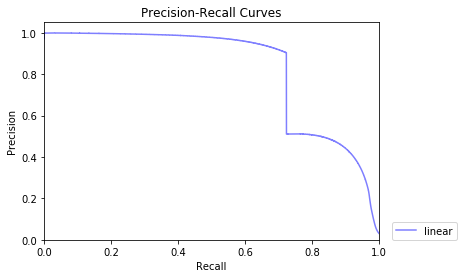

CPU times: user 1min 18s, sys: 11 s, total: 1min 29s
Wall time: 1min 29s


In [15]:
from scoring import graph_precision_recall

%time confidence_SVM_rcv1 = clf_SVM_rcv1.decision_function(rcv1_test.data)

%time graph_precision_recall(rcv1_test.target, [confidence_SVM_rcv1], ['linear'])

### Support Vector Machines on MNIST <a id='svm_mnist'></a>

In [4]:
from sklearn.svm import SVC, LinearSVC

from datasets import load_mnist

#load mnist dataset
mnist_train, mnist_test = load_mnist()

#clf_SVM_mnist is a list of SVM classifiers,
#one classifier uses a polynomial kernel function while the other 
#uses a linear kernel.
clf_SVM_mnist = [SVC(kernel='poly'), LinearSVC()]
%time clf_SVM_mnist = [clf.fit(mnist_train.data, mnist_train.target) for clf in clf_SVM_mnist]

titles_SVM_mnist = ['polynomial', 'linear']

CPU times: user 4min 51s, sys: 232 ms, total: 4min 52s
Wall time: 4min 52s


In [5]:
from scoring import get_scores, print_scores

#for each classifier generate predicted labels for the test data
%time pred_SVM_mnist = [clf.predict(mnist_test.data) for clf in clf_SVM_mnist]

scores_SVM_mnist = [get_scores(mnist_test.target, pred, 'macro') for pred in pred_SVM_mnist]

for title, score in zip(titles_SVM_mnist, scores_SVM_mnist):
    print(f'\n{title}')
    print_scores(score, 'macro')

CPU times: user 2min 14s, sys: 112 ms, total: 2min 14s
Wall time: 2min 14s

polynomial
Accuracy: 0.9772
macro-averaged F1: 0.9770
macro averaged recall: 0.9770
macro averaged precision: 0.9770

linear
Accuracy: 0.8348
macro-averaged F1: 0.8271
macro averaged recall: 0.8312
macro averaged precision: 0.8473


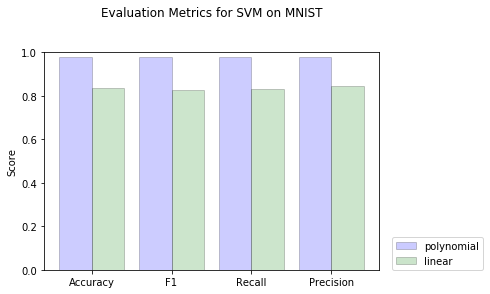

In [6]:
from scoring import graph_scores

graph_scores(scores_SVM_mnist, titles_SVM_mnist, 'SVM on MNIST')

CPU times: user 2min 14s, sys: 124 ms, total: 2min 14s
Wall time: 2min 14s


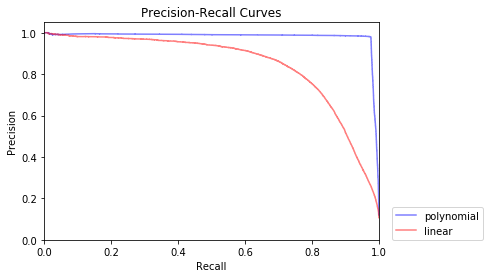

CPU times: user 532 ms, sys: 308 ms, total: 840 ms
Wall time: 434 ms


In [10]:
from scoring import graph_precision_recall

%time confidence_SVM_mnist = [clf.decision_function(mnist_test.data) for clf in clf_SVM_mnist]
%time graph_precision_recall(mnist_test.target, confidence_SVM_mnist, titles_SVM_mnist)

# <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">k-Nearest Neighbors (kNN)</a> <a id='knn'></a>

This algorithm is not trained like the previous machine learning algorithms. Nearest Neighbors is an instance-based learning algorithm. This means is not trained to the data, each prediction is generated by finding the $k$ nearest neighbors [hart1968]. It works by calculating the distance from a query point to all other points in the training set, and the top k closest points are used to generate a prediction [cover-1967]. The class that belogs to the majority of the k neighbors is the class the query point is predicted to have, this is called majority voting [coomans1982]. 

To help improve the voting system in kNN it is possible to inversely weight the class label of each of the nearest neighbors based on their distance to the query point [samworth-2012]. The difference between weighted and unweighted kNN is small and decreases as the number of features increases, but for 15 or less features there has been shown to be at least a 5% improvement [samworth 2012].

Calculating the distance between the query and all of the training points can be very computationally demanding so an additional algorithm an be implemented to help calculate distance. The two most frequently used algorithms are kd-tree and BallTree. Both are considerably faster than calculating neighbors with brute force, and BallTree performs especially well in high dimensions. Note that tree implementations cannot be applied to sparse data. A kd-tree is a multidimensional binary search tree [bentley-1975]. In a kd-tree each node is a sample, and every level of the tree corresponds to a dimension. On each level the remaining samples are split based on their value in that dimension. This forms a binary search tree that allows nearest neighbor lokoup without calculating the distance for each sample [bentley-1975]. A ball tree is a complete binary tree that segments the data points into regions bounded by hyperspheres called balls [omohundro-1989]. Each ball corresponds to a node and is the smallest ball that can contain the balls corresponding to its children nodes [omohundro-1989]. The leaves of a balltree hold the information while the interior nodes are only used to guide the search [omohundro-1989].

Additionally the  <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html">distance metric</a> can be tailored to the dataset. Let $n$ be the number of dimensions in $\vec{x}$, and let $x_i$ represent the $i^{\text{th}}$ dimension of $\vec{x}$.

* Euclidean 
\begin{equation*}
dist(\vec{x}, \vec{y}) = \sum_{i=1}^n (x_i - y_i)^2
\end{equation*}
* Manhattan
\begin{equation*}
dist(\vec{x}, \vec{y}) = \sum_{i=1}^n \mid x_i - y_i \mid
\end{equation*}
* Chebyshev
\begin{equation*}
dist(\vec{x}, \vec{y}) = \max_{i \in [1, n]} ( \mid x_i - y_i \mid )
\end{equation*}
* Minkowski
\begin{equation*}
dist(\vec{x}, \vec{y}) = ( \sum_{i=1}^n \mid x_i - y_i \mid^p )^{1/p}
\end{equation*}

Notice Minowski distance is a generalized form of the other distance formulas. When $p = 1$ it is the same as Manhattan distance, when $p = \infty$ it is the same as Chebyshev distance, and when $p = 2$ it is the same as Euclidean distance. The value for $p$ can be any real number.

### k-Nearest Neighbors on RCV1 <a id='knn_rcv1'></a>

In [16]:
# This command changes the location of the temp storage for the notebook. Needed when running from docker.
%env JOBLIB_TEMP_FOLDER=/home/jovyan/work/tmp

env: JOBLIB_TEMP_FOLDER=/home/jovyan/work/tmp


In [ ]:
from sklearn.datasets import fetch_rcv1

#load the rcv1 dataset if its has not aready been loaded
if('rcv1_train' not in locals() or 'rcv1_test' not in locals()):
    print('Loading datasets')
    rcv1_train, rcv1_test = (fetch_rcv1(subset='train'), fetch_rcv1(subset='test'))

In [17]:
#works
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

clf_kNN_rcv1 = OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree'), n_jobs=-1)

# rcv1 training set does not contain all the labels and throws a warning.
# This with statement will suppress these warnings.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    %time clf_kNN_rcv1.fit(np.array(rcv1_train.data.todense()), np.array(rcv1_train.target.todense()))

CPU times: user 28min 34s, sys: 1min 31s, total: 30min 5s
Wall time: 30min 57s


In [18]:
%time pred_kNN_rcv1_test = clf_kNN_rcv1.predict(np.array(rcv1_test.data[1203].todense()))

CPU times: user 2min 43s, sys: 31 s, total: 3min 14s
Wall time: 3min 18s


As you can see kNN is not feasible on RCV1 as the test set has 781265 samples and it took 3.5 minutes to generate a prediction on one. Because of this we can use dimensionality reduction. For this example we will use  <a target="_top" href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html">truncated singular value decompisition (SVD)</a>. Truncated SVD is intended to work on tf-idf matricies, and it works on sparce input. Because of this it is ideal for the RCV1 dataset.

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100) 
svd.fit(rcv1_train.data)

%time train_data_rcv1 = svd.transform(rcv1_train.data)
%time test_data_rcv1 = svd.transform(rcv1_test.data)

CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 198 ms
CPU times: user 6.33 s, sys: 376 ms, total: 6.7 s
Wall time: 6.7 s


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

#explain why one-v-rest is used
clf_kNN_rcv1_reduced = OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree'), n_jobs=-1)

# rcv1 training set does not contain all the labels and throws a warning.
# This with statement will suppress these warnings.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #fit the kNN classifier to a reduced version of the rcv1 dataset
    %time clf_kNN_rcv1_reduced.fit(train_data_rcv1, rcv1_train.target)

CPU times: user 3.88 s, sys: 16.5 s, total: 20.3 s
Wall time: 21.3 s


In [ ]:
from scoring import get_scores, print_scores

%time pred_kNN_rcv1 = clf_kNN_rcv1_reduced.predict(test_data_rcv1)

scores_kNN_rcv1 = get_scores(rcv1_test.target, pred_kNN_rcv1, 'micro')

print_scores(scores_kNN_rcv1, 'micro')

In [ ]:
from scoring import graph_scores

graph_scores([scores_kNN_rcv1], ['n_components = 100'], 'kNN on RCV1')

### k-Nearest Neighbors on MNIST <a id='knn_mnist'></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from datasets import load_mnist

#load mnist dataset
mnist_train, mnist_test = load_mnist()

#clf_kNN_mnist is a list of kNN classifiers each with different weighting schemes or distance metrics
#parameter p in the KNeighborClassifier constructor sets distance metric p=1 is equivalent to the manhattan distance
#and p=2 is equivalent to the euclidean distance.
clf_kNN_mnist = [KNeighborsClassifier(algorithm='ball_tree', p=1, n_jobs=-1),
           KNeighborsClassifier(algorithm='ball_tree', weights='distance', p=1, n_jobs=-1),
           KNeighborsClassifier(algorithm='ball_tree', weights='distance', p=2, n_jobs=-1),
           KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_jobs=-1)]

%time clf_kNN_mnist = [clf.fit(mnist_train.data, mnist_train.target) for clf in clf_kNN]

titles_kNN_mnist = ['Manhattan', 'Manhattan, Distance Weighted', 'Euclidean, Distance Weighted', 'Chebyshev']

In [ ]:
from scoring import get_scores, print_scores

%time pred_kNN_mnist = [clf.predict(mnist_test.data) for clf in clf_kNN_mnist]

scores_kNN_mnist = [get_scores(mnist_test.target, pred, 'macro') for pred in pred_kNN_mnist]

for title, score in zip(titles_kNN_mnist, scores_kNN_mnist):
    print(f'\n{title}')
    print_scores(score, 'macro')

In [ ]:
from scoring import graph_scores

graph_scores(scores_kNN_mnist, titles_kNN_mnist, 'kNN on MNIST')

In [ ]:
from scoring import graph_precision_recall

%time confidence_kNN_mnist = [clf.predict_proba(mnist_test.data) for clf in clf_kNN_mnist]
%time graph_precision_recall(mnist_test.target, confidence_kNN_mnist, titles_kNN_mnist)

# <a target="_top" href="http://scikit-learn.org/stable/modules/tree.html">Decision Trees</a> <a id='decision_trees'></a>

Decision Trees form a heirarchy of rules used to classify a document. Decision trees take the form of a tree, as the name suggests. Each node in the tree is a rule and each child node represents a possible outcome. A decision tree is traversed by starting at the root and moving to the appropriate child node based on the current node's rule. This makes decision trees easy to visualize and interpret. 

There are several algorithms for building decision trees, the two most popular are Classification and Regression Tree (CART) and C4.5 algorithms. Scikit-learn uses a variation of the CART algorithm.

There are two main criterion that can be used to split a decision tree node. 
1. Gini impurity is typically used with the CART algorithm. Let $p_{mk}$ be the probability of a document being in node $m$ belonging to class $k$. See equation 8.6 from [James 2009].
\begin{equation}
G = \sum^K_{k=1} p_{mk} (1 - p_{mk} )
\end{equation}
2. Information gain, or entropy, is typically used with the C4.5 algorithm. See equation 8.7 from [James 2009].
\begin{equation}
D = - \sum^K_{k=1} p_{mk} log( p_{mk} )
\end{equation}

### Decision Trees on RCV1<a id='dt_rcv1'></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.datasets import fetch_rcv1

#load the rcv1 dataset if its has not aready been loaded
if('rcv1_train' not in locals() or 'rcv1_test' not in locals()):
    print('Loading datasets')
    rcv1_train, rcv1_test = (fetch_rcv1(subset='train'), fetch_rcv1(subset='test'))


clf_DT_rcv1 = [OneVsRestClassifier(DecisionTreeClassifier(criterion='gini'), n_jobs=-1),
          OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy'), n_jobs=-1)]

# rcv1 training set does not contain all the labels and throws a warning.
# This with statement will suppress these warnings.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    %time clf_DT_rcv1 = [clf.fit(rcv1_train.data, rcv1_train.target) for clf in clf_DT_rcv1]

titles_DT_rcv1 = ['Gini Impurity', 'Entropy']

In [ ]:
from scoring import get_scores, print_scores

%time pred_DT_rcv1 = [clf.predict(rcv1_test.data) for clf in clf_DT_rcv1]

scores_DT_rcv1 = [get_scores(rcv1_test.target, pred, 'micro') for pred in pred_DT_rcv1]

for title, score in zip(titles_DT_rcv1, scores_DT_rcv1:
    print(f'\n{title}')
    print_scores(score, 'micro')

In [ ]:
from scoring import graph_scores

graph_scores(scores_DT_rcv1, titles_DT_rcv1, 'Decision Trees on RCV1')

In [ ]:
from scoring import graph_precision_recall

%time confidence_DT_rcv1 = [clf.predict_proba(rcv1_test.data) for clf in clf_DT_rcv1]
%time graph_precision_recall(rcv1_test.target, confidence_DT_rcv1, titles_DT_rcv1)

### Decision Trees on MNIST <a id='dt_mnist'></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

from datasets import load_mnist

#load mnist dataset
mnist_train, mnist_test = load_mnist()

clf_DT_mnist = [DecisionTreeClassifier(criterion='gini'),
          DecisionTreeClassifier(criterion='entropy')]

%time clf_DT_mnist =  [clf.fit(mnist_train.data, mnist_train.target) for clf in clf_DT_mnist]

titles_DT_mnist = ['Gini Impurity', 'Entropy']

In [ ]:
from scoring import get_scores, print_scores

%time pred_DT_mnist = [clf.predict(mnist_test.data) for clf in clf_DT_mnist]

scores_DT_mnist = [get_scores(mnist_test.target, pred, 'macro') for pred in pred_DT_mnist]

for title, score in zip(titles_DT_mnist, scores_DT_mnist):
    print(f'\n{title}')
    print_scores(score, 'macro')

In [ ]:
from scoring import graph_scores

graph_scores(scores_DT_mnist, titles_DT_mnist, 'Decision Trees on MNIST')

In [ ]:
from scoring import graph_precision_recall

%time confidence_DT_mnist = [clf.predict_proba(mnist_test.data) for clf in clf_DT_mnist]
%time graph_precision_recall(mnist_test.target, confidence_DT_mnist, titles_DT_mnist)

# Random Forests <a id='random_forests'></a>

Random Forests are a kind of ensemble learning algorithm. Ensemble learning algorithms combine multiple machine learning algorithms to improve accuracy. A Random Forest is a collection of Decision Trees where the predictors for splits are chosen at random. On average random forests tend to perform better than a single decision tree.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1)

rfc = RandomForestClassifier(criterion='gini', max_depth=2, max_features='sqrt', 
                             max_leaf_nodes=None, n_jobs=1, random_state=0)


rfc.fit(X_train, y_train)
rfScore = rfc.score(X_test, y_test)

print('Random forest classification accuracy: ' + str(rfScore))



dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

dtScore = dt.score(X_test, y_test)

print('Decision tree classification accuracy: ' + str(dtScore))



In [ ]:
#add random forest on mnsit